In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate random data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.normal(0, 1, X.shape[0]).reshape(-1, 1)

In [3]:
# Convert the data to PyTorch tensors:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [4]:
# Crete the neural netrowk
class RegressionNet(nn.Module):
  def __init__(self):
    super(RegressionNet, self).__init__()
    self.fc = nn.Linear(1, 1) # 1 input feature, 1 output (for regression)

  def forward(self, x):
    return self.fc(x)

In [5]:
# initialize the model choose a loss function and optimizer
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
# train the model
epochs = 1000
for epoch in range(epochs):
  model.train() # Set the model in training mode
  optimizer.zero_grad() # Zero gradients from the previous iteration

  # Forward pass
  predictions = model(X_tensor)
  loss = criterion(predictions, y_tensor)

  # Backward pass and optimization
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.8458
Epoch [200/1000], Loss: 0.8263
Epoch [300/1000], Loss: 0.8191
Epoch [400/1000], Loss: 0.8165
Epoch [500/1000], Loss: 0.8155
Epoch [600/1000], Loss: 0.8151
Epoch [700/1000], Loss: 0.8150
Epoch [800/1000], Loss: 0.8149
Epoch [900/1000], Loss: 0.8149
Epoch [1000/1000], Loss: 0.8149


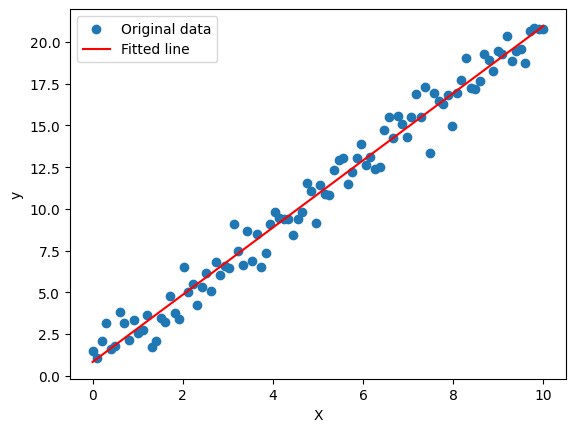

In [7]:
model.eval()  # Set the model in evaluation mode

with torch.no_grad():
    plt.scatter(X, y, label="Original data")
    plt.plot(X, model(X_tensor).detach().numpy(), 'r', label="Fitted line")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()
